In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

2025-06-16 12:04:04.263327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750043044.292612   58332 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750043044.301881   58332 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750043044.324063   58332 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750043044.324089   58332 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750043044.324091   58332 computation_placer.cc:177] computation placer alr

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

/home/yjh/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-16 12:04:09.937514: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20


2025-06-16 12:04:10.264135: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7398 - loss: 0.7270

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7398 - loss: 0.7269 - val_accuracy: 0.8776 - val_loss: 0.3320
Epoch 2/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8682 - loss: 0.3695

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8683 - loss: 0.3694 - val_accuracy: 0.8929 - val_loss: 0.2887
Epoch 3/20
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8852 - loss: 0.3126

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8852 - loss: 0.3126 - val_accuracy: 0.8993 - val_loss: 0.2703
Epoch 4/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8975 - loss: 0.2793

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8975 - loss: 0.2793 - val_accuracy: 0.9078 - val_loss: 0.2512
Epoch 5/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9061 - loss: 0.2540

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9061 - loss: 0.2540 - val_accuracy: 0.9138 - val_loss: 0.2368
Epoch 6/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9131 - loss: 0.2327

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9131 - loss: 0.2326 - val_accuracy: 0.9164 - val_loss: 0.2354
Epoch 7/20
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9199 - loss: 0.2153

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9199 - loss: 0.2153 - val_accuracy: 0.9166 - val_loss: 0.2347
Epoch 8/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9260 - loss: 0.1945

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9260 - loss: 0.1945 - val_accuracy: 0.9171 - val_loss: 0.2358
Epoch 9/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9299 - loss: 0.1822

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9299 - loss: 0.1822 - val_accuracy: 0.9193 - val_loss: 0.2302
Epoch 10/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9356 - loss: 0.1687

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9356 - loss: 0.1687 - val_accuracy: 0.9197 - val_loss: 0.2465
Epoch 11/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9404 - loss: 0.1591

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9404 - loss: 0.1591 - val_accuracy: 0.9229 - val_loss: 0.2429


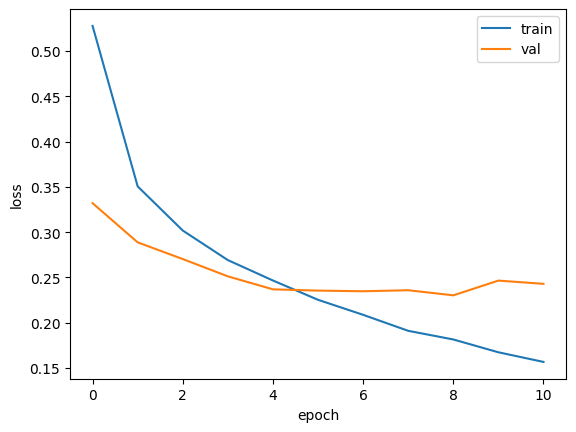

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9190 - loss: 0.2234


[0.2302028387784958, 0.9193333387374878]

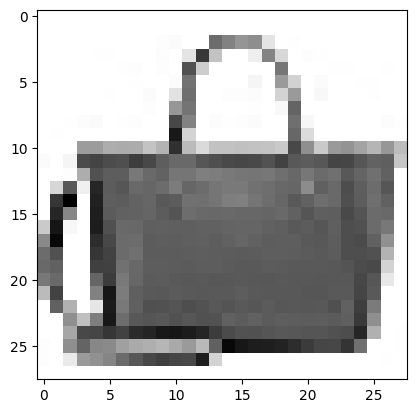

In [11]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [12]:
import numpy as np
preds = model.predict(val_scaled[0:1])
print(preds)
print(np.argmax(preds))
print(val_target[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[3.2563084e-25 2.5644759e-36 2.1812719e-28 2.7921099e-24 4.4968196e-26
  2.3356223e-22 4.2761444e-24 2.2168960e-23 1.0000000e+00 3.3112882e-24]]
8
[8]
